1)	The Iris dataset is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width). Use SVC from sklearn.svm on the Iris dataset and follow the steps below:
a)	Load the dataset and perform train–test split (80:20).

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


b)	Train three different SVM models using the following kernels:
Linear, Polynomial (degree=3), RBF


In [3]:
kernels = ['linear', 'poly', 'rbf']
models = {}
results = {}

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3)
    else:
        model = SVC(kernel=kernel)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store model and metrics
    models[kernel] = model
    results[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


c)	Evaluate each model using:
•	Accuracy
•	Precision
•	Recall
•	F1-Score


In [4]:
metrics_df = pd.DataFrame({k: {metric: round(v[metric], 3) for metric in v if metric != 'Confusion Matrix'} for k, v in results.items()})
print("Performance Comparison:\n")
print(metrics_df)


Performance Comparison:

           linear   poly    rbf
Accuracy      1.0  0.967  0.967
Precision     1.0  0.970  0.970
Recall        1.0  0.967  0.967
F1-Score      1.0  0.967  0.967


d)	Display the confusion matrix for each kernel.

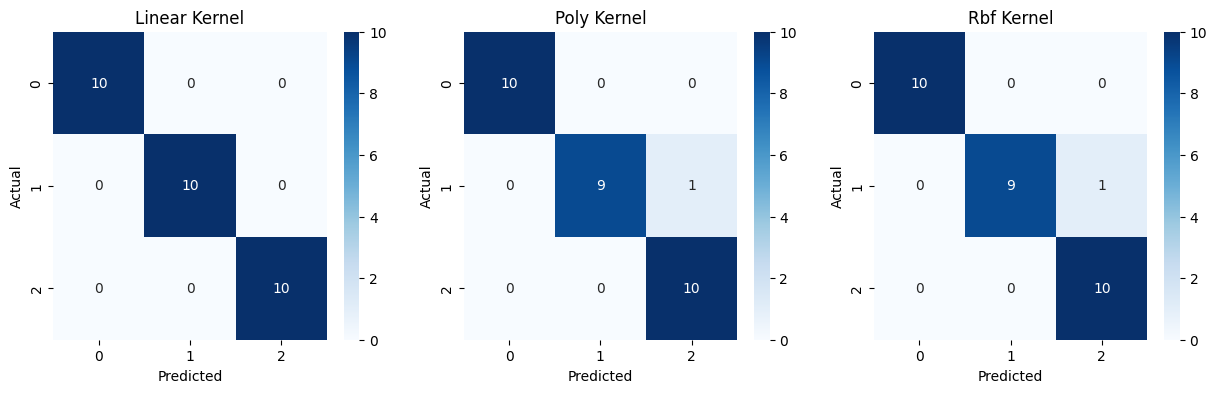

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, kernel in enumerate(kernels):
    sns.heatmap(results[kernel]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{kernel.capitalize()} Kernel')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.show()


e)	Identify which kernel performs the best and why.

Linear or Rbf

2)	SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.
A) Use the Breast Cancer dataset from sklearn.datasets.load_breast_cancer.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


B) Train an SVM (RBF kernel) model with and without feature scaling (StandardScaler). Compare both results using:
•	Training accuracy
•	Testing accuracy


In [7]:
# Without scaling
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
train_acc_unscaled = svm_unscaled.score(X_train, y_train)
test_acc_unscaled = svm_unscaled.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
train_acc_scaled = svm_scaled.score(X_train_scaled, y_train)
test_acc_scaled = svm_scaled.score(X_test_scaled, y_test)

comparison = pd.DataFrame({
    'Model': ['Without Scaling', 'With Scaling'],
    'Train Accuracy': [train_acc_unscaled, train_acc_scaled],
    'Test Accuracy': [test_acc_unscaled, test_acc_scaled]
})
print(comparison)


             Model  Train Accuracy  Test Accuracy
0  Without Scaling        0.918681       0.929825
1     With Scaling        0.982418       0.982456


C) Discuss the effect of feature scaling on SVM performance.

Feature scaling greatly improves performance and stability of SVM models, particularly with non-linear kernels (RBF, polynomial).